In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from termcolor import colored, cprint

In [2]:
portfolio_number = 17
portfolio_info = ''
portfolio_17 = ['GCY.AX', 'KZR.AX', 'WMC.AX', 'FJZ.F', 'BTO.TO', 'CXB.TO', 'GCM.TO', 'HRT.TO', 'KNT.TO', 'LUG.TO', 'STGO.TO', 'TXG.TO', 'AGD.V', 'AVG.V', 'ELO.V', 'FGC.V', 'LPK.V', 'OSU.V', 'RCT.V', 'VEIN.V', 'WKG.V', 'ZON.V']
quantity = [1400, 1500, 358, 120, 40, 200, 40, 3300, 28, 20, 150, 15, 4000, 2200, 50, 6500, 3900, 800, 2800, 300, 1500, 1000]
benchmark_17 = ['GLTR']
start = '2021-10-28'
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
#df_17 = yf.download(portfolio_17, start, end)["Close"]
df_17 = pd.DataFrame(columns=portfolio_17)
for ticker in portfolio_17:
    df_17[ticker] = yf.download(ticker, start, end, progress = False)['Adj Close']
index_df_17 = yf.download(benchmark_17, start, end, progress = False)["Adj Close"]

In [3]:
first_sum_portfolio_17 = sum(df_17.iloc[0]*quantity)
current_sum_portfolio_17 = sum(df_17.iloc[-1]*quantity)
growth_portfolio_17 = (current_sum_portfolio_17 - first_sum_portfolio_17)/first_sum_portfolio_17

In [4]:
risk_free_rate = 0.02
std_17 = df_17.pct_change().mean(axis=1).dropna().std()
Sharp_17 = ((growth_portfolio_17 - risk_free_rate)/std_17)*np.sqrt(len(df_17)

SyntaxError: unexpected EOF while parsing (<ipython-input-4-770dd2fc6cc7>, line 3)

In [5]:
net_returns = df_17.pct_change().mean(axis=1).dropna() - df_17.pct_change().mean(axis=1).dropna().mean()
negative_returns = net_returns[net_returns < 0]
semi_dev = np.sqrt(np.sum((negative_returns**2))/len(net_returns))
Sortino_17 = ((growth_portfolio_17 - risk_free_rate)/semi_dev) * np.sqrt(len(df_17))

NameError: name 'risk_free_rate' is not defined

In [6]:
print('Портфель №', portfolio_number)
print(portfolio_info)
print('Первоначальная стоимость портфеля', round(first_sum_portfolio_17))
print('Текущая стоимость портфеля', round(current_sum_portfolio_17))
print('Рост стоимости портфеля', round(growth_portfolio_17*100, 2), '%')
print('Sharp', round(Sharp_17, 2))
print('Sortino', round(Sortino_17,2))

Портфель № 17

Первоначальная стоимость портфеля 5496
Текущая стоимость портфеля 4948
Рост стоимости портфеля -9.98 %


NameError: name 'Sharp_17' is not defined

In [ ]:
df_17.head()

In [7]:
currency = ['CADEUR=X', 'AUDEUR=X', 'EURTRY=X', 'CHFEUR=X', 'MYREUR=X', 'MXNEUR=X', 'GBPEUR=X', 'SGDEUR=X', \
            'HKDEUR=X', 'ZAREUR=X', 'EURILS=X', 'JPYEUR=X', 'EURRUB=X', 'USDEUR=X']
df_currency = pd.DataFrame()
for currency in currency:
    df_currency[currency] = yf.download(currency, start, end = datetime.datetime.today().date(), progress = False)['Adj Close']

In [8]:
for column in range(len(df_17.columns.tolist())):
    if ".V" in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['CADEUR=X']
    elif '.TO' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['CADEUR=X']
    elif '.IS' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]/df_currency['EURTRY=X']
    elif '.SW' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['CHFEUR=X']
    elif '.KL' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['MYREUR=X']
    elif '.MX' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['MXNEUR=X']
    elif '.L' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['GBPEUR=X']/100
    elif '.SI' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['SGDEUR=X']
    elif '.HK' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['HKDEUR=X']
    elif '.AX' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['AUDEUR=X']
    elif '.JO' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['ZAREUR=X']/100
    elif '.TA' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]/df_currency['EURILS=X']
    elif '.T' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['JPYEUR=X']
    elif '.ME' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]/df_currency['EURRUB=X']
    elif '.MC' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    elif '.F' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    elif '.AS' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    elif '.BR' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    elif '.PA' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    elif '.MI' in df_17.columns.tolist()[column]:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*1
    else:
        col = df_17.columns.tolist()[column]
        df_17[col] = df_17[col]*df_currency['USDEUR=X']        

In [9]:
quantity = [400, 400, 2000, 2000, 100, 30, 500, 1000, 10, 500, 30, 60, 60, 300, 100, 500, 200, 200, 50, 450, 1000, 200, 200, 100, 300]
(df_17*quantity).sum(axis=1).pct_change().dropna().cumsum()

ValueError: Unable to coerce to Series, length must be 22: given 25

In [ ]:
cum_benchmark_returns = index_df_17.pct_change().dropna().cumsum()

In [ ]:
cum_portfolio_returns = (df_17*quantity).sum(axis=1).pct_change().dropna().cumsum()

In [ ]:

cumprod_ret = ((df_17*quantity).pct_change().mean(axis=1).dropna()+1).cumprod()*100
cumprod_market_ret = (index_df_17.pct_change().dropna()+1).cumprod()*100
cumprod_ret.index = pd.to_datetime(cumprod_ret.index)
trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()
peak_index = cumprod_ret.loc[:trough_index].idxmax()
maximum_drawdown = 100 * \
    (cumprod_ret[trough_index] - cumprod_ret[peak_index]) / \
    cumprod_ret[peak_index]
print('The maximum drawdown is %.2f%%' % maximum_drawdown)

### Упаковано в функцию

In [84]:
portfolio_numbers = []
portfolio_name = []
porfolio_price = []
def portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start):
    end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
    
    df = pd.DataFrame(columns=portfolio)
    for ticker in portfolio:
        df[ticker] = yf.download(ticker, start, end, progress = False)['Adj Close']
    index_df = yf.download(benchmark, start, end, progress = False)["Adj Close"]
    df = df.fillna(0)
    
    currency = ['CADEUR=X', 'AUDEUR=X', 'EURTRY=X', 'CHFEUR=X', 'MYREUR=X', 'MXNEUR=X', 'GBPEUR=X', 'SGDEUR=X', \
            'HKDEUR=X', 'ZAREUR=X', 'EURILS=X', 'JPYEUR=X', 'EURRUB=X', 'USDEUR=X']
    df_currency = pd.DataFrame()
    for currency in currency:
        df_currency[currency] = yf.download(currency, start, end = datetime.datetime.today().date(), progress = False)['Adj Close']
    
    for column in range(len(df.columns.tolist())):
        if ".V" in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['CADEUR=X']
        elif '.TO' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['CADEUR=X']
        elif '.IS' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]/df_currency['EURTRY=X']
        elif '.SW' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['CHFEUR=X']
        elif '.KL' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['MYREUR=X']
        elif '.MX' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['MXNEUR=X']
        elif '.L' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['GBPEUR=X']/100
        elif '.SI' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['SGDEUR=X']
        elif '.HK' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['HKDEUR=X']
        elif '.AX' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['AUDEUR=X']
        elif '.JO' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['ZAREUR=X']/100
        elif '.TA' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]/df_currency['EURILS=X']
        elif '.T' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['JPYEUR=X']
        elif '.ME' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]/df_currency['EURRUB=X']
        elif '.MC' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        elif '.F' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        elif '.AS' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        elif '.BR' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        elif '.PA' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        elif '.MI' in df.columns.tolist()[column]:
            col = df.columns.tolist()[column]
            df[col] = df[col]*1
        else:
            col = df.columns.tolist()[column]
            df[col] = df[col]*df_currency['USDEUR=X']   
    
    
    cum_portfolio_returns = (df*quantity).sum(axis=1).pct_change().dropna().cumsum()
    cum_benchmark_returns = index_df.pct_change().dropna().cumsum()
    
    first_sum_portfolio = sum(df.iloc[0]*quantity)
    current_sum_portfolio = sum(df.iloc[-1]*quantity)
    growth_portfolio = (current_sum_portfolio - first_sum_portfolio)/first_sum_portfolio
    
    risk_free_rate = 0
    std = (df*quantity).sum(axis=1).pct_change().dropna().std()
    Sharp = ((growth_portfolio - risk_free_rate)/std)*np.sqrt(len(df))
    
    net_returns = (df*quantity).sum(axis=1).pct_change().dropna() - (df*quantity).sum(axis=1).pct_change().dropna().mean()
    negative_returns = net_returns[net_returns < 0]
    semi_dev = np.sqrt(np.sum((negative_returns**2))/len(net_returns))
    Sortino = ((growth_portfolio - risk_free_rate)/semi_dev) * np.sqrt(len(df))
    
    cumprod_ret = ((df*quantity).sum(axis=1).pct_change().dropna()+1).cumprod()*100
    cumprod_market_ret = (index_df.pct_change().dropna()+1).cumprod()*100
    cumprod_ret.index = pd.to_datetime(cumprod_ret.index)
    trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()
    peak_index = cumprod_ret.loc[:trough_index].idxmax()
    maximum_drawdown = 100 * \
        (cumprod_ret[trough_index] - cumprod_ret[peak_index]) / \
        cumprod_ret[peak_index]
    

    
    
    print('Портфель №', portfolio_number)
    print(portfolio_info)
    print('********************************')
    print('Первоначальная стоимость портфеля', round(first_sum_portfolio))
    print('Текущая стоимость портфеля', round(current_sum_portfolio))
    print('********************************')
    print(colored('Доходность портфеля', 'green', attrs=['underline']), round(growth_portfolio*100, 2), '%')
    print(colored('Доходность портфеля годовая', 'blue', attrs=['underline']), round(((growth_portfolio*100)/len(df))*252, 2), '%')
    print(colored('Доходность индекса годовая', 'magenta', attrs=['underline']), round(((cum_benchmark_returns[-1]*100)/len(df))*252, 2), '%')
    print('********************************')
    print(colored('Maximum Drawdown %.2f%%' % maximum_drawdown, 'red'))
    print('Sharp', round(Sharp, 2))
    print('Sortino', round(Sortino,2))
    
    plt.plot(cum_portfolio_returns, 'g', label='Доходность портфеля')
    plt.plot(cum_benchmark_returns, 'orange', label='Доходность индекса')
    plt.title('Сравнение доходностей')
    plt.xlabel('Дата')
    plt.ylabel('Доходность')
    plt.legend()
    plt.show()

#    portfolio_number = float(portfolio_number)
    portfolio_numbers.append(portfolio_number)
    portfolio_name.append(portfolio_info)
    porfolio_price.append(current_sum_portfolio)
    
    return 

Портфель № 1
Российский портфель (8 шт). Был выбран из 71 российских компаний без банков по фактору Valuation 3.0. (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 3662
Текущая стоимость портфеля 3444
********************************
Доходность портфеля -5.97 %
Доходность портфеля годовая -31.99 %
Доходность индекса годовая -21.45 %
********************************
Maximum Drawdown -16.59%
Sharp -28.47
Sortino -38.38


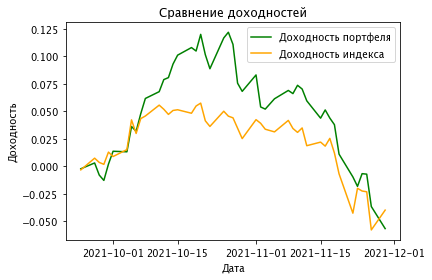

In [85]:
portfolio_number = 1
portfolio_info = 'Российский портфель (8 шт). Был выбран из 71 российских компаний без банков по фактору Valuation 3.0. (регрессия EBITDA)'
portfolio = ['ENPG.ME', 'NMTP.ME', 'IRAO.ME', 'AGRO.ME', 'TATNP.ME', 'MSNG.ME', 'LSNGP.ME', 'OGKB.ME']
quantity = [50, 5000, 9000, 35, 80, 15000, 220, 60000]
benchmark = ['IMOEX.ME']
start = '2021-09-24'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 2
Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору XGBoost (fixed feach) + Valuation3.0 (normal). (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 1948
Текущая стоимость портфеля 1814
********************************
Доходность портфеля -6.89 %
Доходность портфеля годовая -41.31 %
Доходность индекса годовая -31.64 %
********************************
Maximum Drawdown -16.15%
Sharp -31.44
Sortino -44.18


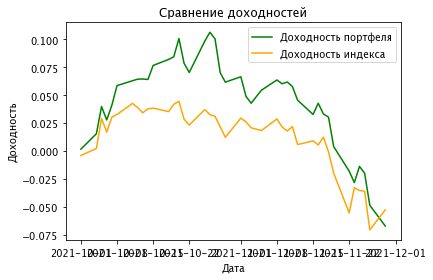

In [86]:
portfolio_number = 2
portfolio_info = 'Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору XGBoost (fixed feach) + Valuation3.0 (normal). (регрессия EBITDA)'
portfolio = ['TATNP.ME', 'LSNGP.ME', 'OGKB.ME', 'RSTI.ME', 'MSRS.ME', 'RTKMP.ME', 'ROSN.ME', 'MTSS.ME', 'KZOSP.ME', 'KZOS.ME', 'LKOH.ME']
quantity = [30, 100, 24000, 14000, 14000, 160, 25, 40, 400, 140, 2]
benchmark = ['IMOEX.ME']
start = '2021-10-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 3
Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 1441
Текущая стоимость портфеля 1380
********************************
Доходность портфеля -4.26 %
Доходность портфеля годовая -25.55 %
Доходность индекса годовая -31.64 %
********************************
Maximum Drawdown -12.69%
Sharp -19.78
Sortino -27.18


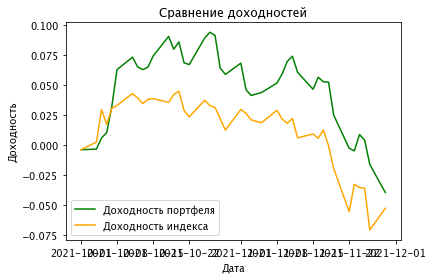

In [87]:
portfolio_number = 3
portfolio_info = 'Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)'
portfolio = ['LKOH.ME', 'PLZL.ME', 'GAZP.ME', 'PHOR.ME', 'RUAL.ME', 'PIKK.ME', 'MAGN.ME', 'FLOT.ME', 'NKNC.ME', 'GCHE.ME']
quantity = [2, 1, 30, 2, 180, 10, 180, 150, 90, 4]
benchmark = ['IMOEX.ME']
start = '2021-10-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 4
Мексиканский портфель (12 шт). Был выбран из 83 мексиканских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 3882
Текущая стоимость портфеля 3908
********************************
Доходность портфеля 0.68 %
Доходность портфеля годовая 4.2 %
Доходность индекса годовая -46.08 %
********************************
Maximum Drawdown -4.11%
Sharp 5.7
Sortino 7.99


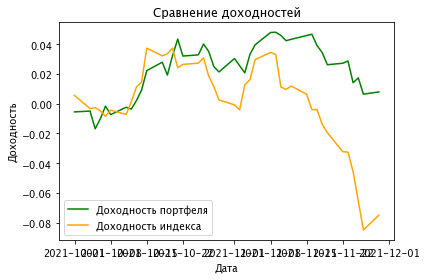

In [88]:
portfolio_number = 4
portfolio_info = 'Мексиканский портфель (12 шт). Был выбран из 83 мексиканских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)'
portfolio = ['CYDSASAA.MX', 'LAMOSA.MX', 'BIMBOA.MX', 'ALSEA.MX', 'GMEXICOB.MX', 'GCC.MX', 'FRAGUAB.MX', 'ALFAA.MX', 'POSADASA.MX', 'KIMBERA.MX', 'UNIFINA.MX', 'VESTA.MX']
quantity = [500, 100, 100, 100, 100, 100, 30, 500, 300, 200, 200, 200]
benchmark = ['EWW']
start = '2021-10-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 5
Канадский венчурный портфель (25 шт). Был выбран из 200 канадских компаний венчурной биржи без банков по фактору XBOOST dinamic 6 +val. (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 6679
Текущая стоимость портфеля 6784
********************************
Доходность портфеля 1.57 %
Доходность портфеля годовая 9.44 %
Доходность индекса годовая 24.92 %
********************************
Maximum Drawdown -10.66%
Sharp 6.75
Sortino 8.8


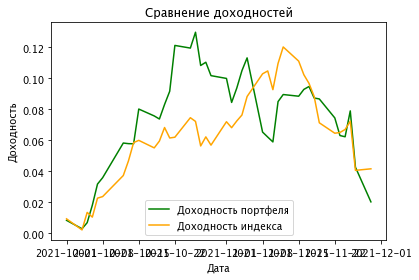

In [89]:
portfolio_number = 5
portfolio_info = 'Канадский венчурный портфель (25 шт). Был выбран из 200 канадских компаний венчурной биржи без банков по фактору XBOOST dinamic 6 +val. (регрессия EBITDA)'
portfolio = ['BCM.V', 'IFOS.V', 'SFR.V', 'THX.V', 'CKG.V', 'GBR.V', 'LME.V', 'ORG.V', 'RZZ.V', 'JEV.V', 'GZZ.V', 'VMC.V', 'RECO.V', 'GRAT.V', 'ACST.V', 'HPQ.V', 'OYL.V', 'CAD.V', 'QIPT.V', 'PBX.V', 'FPX.V', 'DME.V', 'HEO.V', 'NLC.V', 'BSR.V']
quantity = [400, 400, 2000, 2000, 100, 30, 500, 1000, 10, 500, 30, 60, 60, 300, 100, 500, 200, 200, 50, 450, 1000, 200, 200, 100, 300]
benchmark = ['XCS.TO']
start = '2021-10-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 6
Швейцарский портфель (9 шт). Был выбран из 120 компаний без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA) - удалены LISP (из-за цены акции) KNIN (пузырится) и SGSN (цена акции), EI (не швейцария), GE (не швейцария), STMN (пузырится), LONN (пузырится), GEBN(пузырится), FHZN (аэропорт)
********************************
Первоначальная стоимость портфеля 6271
Текущая стоимость портфеля 6661
********************************
Доходность портфеля 6.22 %
Доходность портфеля годовая 38.23 %
Доходность индекса годовая 33.08 %
********************************
Maximum Drawdown -4.48%
Sharp 53.58
Sortino 74.16


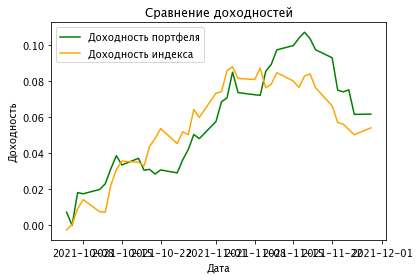

In [90]:
portfolio_number = 6
portfolio_info = 'Швейцарский портфель (9 шт). Был выбран из 120 компаний без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA) - удалены LISP (из-за цены акции) KNIN (пузырится) и SGSN (цена акции), EI (не швейцария), GE (не швейцария), STMN (пузырится), LONN (пузырится), GEBN(пузырится), FHZN (аэропорт)'
portfolio = ['TEMN.SW', 'ROG.SW', 'SUN.SW', 'SCHP.SW', 'BARN.SW', 'RO.SW', 'TECN.SW', 'NOVN.SW', 'NESN.SW']
quantity = [5, 2, 8, 2, 1, 1, 1, 8, 6]
benchmark = ['EWL']
start = '2021-10-04'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

In [91]:
portfolio_name

['Российский портфель (8 шт). Был выбран из 71 российских компаний без банков по фактору Valuation 3.0. (регрессия EBITDA)',
 'Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору XGBoost (fixed feach) + Valuation3.0 (normal). (регрессия EBITDA)',
 'Российский портфель (11 шт). Был выбран из 71 российских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)',
 'Мексиканский портфель (12 шт). Был выбран из 83 мексиканских компаний без банков по фактору KNN (dynamic feach 10 + VAL) + Valuation3.0 (normal). (регрессия EBITDA)',
 'Канадский венчурный портфель (25 шт). Был выбран из 200 канадских компаний венчурной биржи без банков по фактору XBOOST dinamic 6 +val. (регрессия EBITDA)',
 'Швейцарский портфель (9 шт). Был выбран из 120 компаний без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA) - удалены LISP (из-за цены акции) KNIN (пузырится) и SGSN (цена акции), EI (не швейцария), GE (не швейцар

Портфель № 7
Австралийский портфель (13 шт). Был выбран из 80 компаний без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA) 
********************************
Первоначальная стоимость портфеля 2629
Текущая стоимость портфеля 2571
********************************
Доходность портфеля -2.21 %
Доходность портфеля годовая -13.92 %
Доходность индекса годовая -0.32 %
********************************
Maximum Drawdown -7.41%
Sharp -14.83
Sortino -19.51


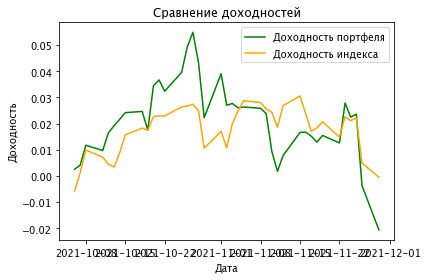

In [92]:
portfolio_number = 7
portfolio_info = 'Австралийский портфель (13 шт). Был выбран из 80 компаний без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA) '
portfolio = ['HVN.AX', 'OSH.AX', 'WES.AX', 'IPL.AX', 'SUN.AX', 'ORI.AX', 'MGR.AX', 'TCL.AX', 'RHC.AX', 'AWC.AX', 'BSL.AX', 'WOR.AX', 'TWE.AX']
quantity = [72, 72, 6, 96, 24, 24, 120, 24, 5, 140, 17, 30, 24]
benchmark = ['^AXJO']
start = '2021-10-05'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 8
Сингапурский портфель (24 шт). Был выбран из 200 компаний по капитализации без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA)
********************************
Первоначальная стоимость портфеля 2870
Текущая стоимость портфеля 3077
********************************
Доходность портфеля 7.22 %
Доходность портфеля годовая 46.66 %
Доходность индекса годовая 11.35 %
********************************
Maximum Drawdown -2.80%
Sharp 76.53
Sortino 102.51


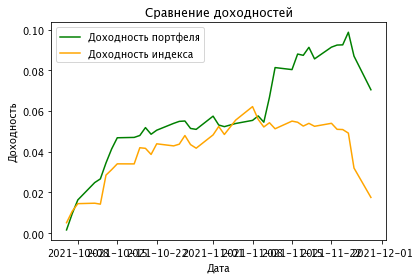

In [93]:
portfolio_number = 8
portfolio_info = 'Сингапурский портфель (24 шт). Был выбран из 200 компаний по капитализации без банков по фактору KNN dinamic 6 +val. (регрессия EBITDA)'
portfolio = ['BMGU.SI', '5JS.SI', '5CP.SI', 'B28.SI', 'F99.SI', 'F9D.SI', 'P34.SI', 'CC3.SI', 'M1GU.SI', 'P40U.SI', 'S08.SI', '5G3.SI', 'D5IU.SI', 'S20.SI', 'S61.SI', 'U10.SI', 'RW0U.SI', 'S85.SI', 'S59.SI', 'F1E.SI', 'F03.SI', 'ME8U.SI', 'H15.SI', 'AWX.SI']
quantity = [300, 500, 500, 200, 100, 200, 200, 100, 300, 200, 200, 400, 3000, 100, 100, 100, 200, 300, 100, 300, 200, 100, 100, 100]
benchmark = ['^STI']
start = '2021-10-05'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 9
ЮАР портфель (20 шт). Был выбран из 100 компаний без банков по фактору KNN dinamic 10 +val. (регрессия EBITDA) 
********************************
Первоначальная стоимость портфеля 2880
Текущая стоимость портфеля 2822
********************************
Доходность портфеля -2.01 %
Доходность портфеля годовая -14.46 %
Доходность индекса годовая 42.33 %
********************************
Maximum Drawdown -10.68%
Sharp -6.59
Sortino -8.61


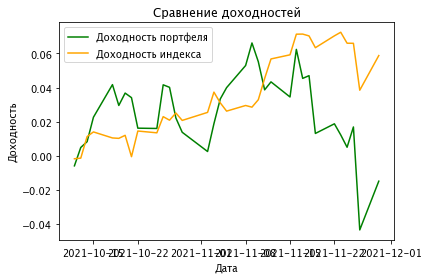

In [94]:
portfolio_number = 9
portfolio_info = 'ЮАР портфель (20 шт). Был выбран из 100 компаний без банков по фактору KNN dinamic 10 +val. (регрессия EBITDA) '
portfolio = ['ACL.JO', 'SAP.JO', 'PSG.JO', 'RBP.JO', 'MSM.JO', 'NY1.JO', 'RLO.JO', 'BAW.JO', 'NTC.JO', 'LHC.JO', 'MTN.JO', 'GLN.JO', 'ADH.JO', 'SSS.JO', 'TXT.JO', 'REM.JO', 'RDF.JO', 'DGH.JO', 'APN.JO']
quantity = [400, 60, 30, 30, 45, 55, 55, 20, 165, 115, 15, 35, 165, 190, 5, 20, 600, 15, 10]
benchmark = ['^J203.JO']
start = '2021-10-11'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 10
Американский портфель(27 шт) Выбран из 293 компаний из последнего квантиля списка американских акций на тинькове по капитализации, взяли 10 процентов от последнего квантиля. Компании с малой капитализацией. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4838
Текущая стоимость портфеля 4821
********************************
Доходность портфеля -0.34 %
Доходность портфеля годовая -2.96 %
Доходность индекса годовая -11.22 %
********************************
Maximum Drawdown -8.09%
Sharp -1.15
Sortino -2.0


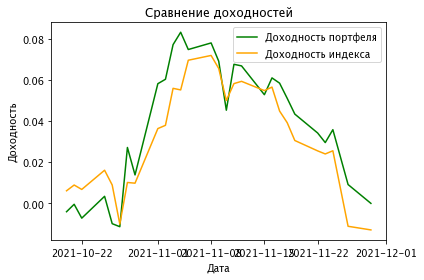

In [ ]:
portfolio_number = 10
portfolio_info = 'Американский портфель(27 шт) Выбран из 293 компаний из последнего квантиля списка американских акций на тинькове по капитализации, взяли 10 процентов от последнего квантиля. Компании с малой капитализацией. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['WIRE', 'KAI', 'GBX', 'PRFT', 'APPS', 'ENPH', 'STAA', 'VCEL', 'KOPN', 'FIVN', 'ARWR', 'AXON', 'CLSK', 'ARCT', 'SUPN', 'CORR', 'HEAR', 'GBT', 'WKHS', 'BH', 'ZGNX', 'VEC', 'BLDR', 'HIBB', 'BPMC', 'REX', 'JOUT']
quantity = [2, 1, 5, 2, 2, 1, 2, 4, 44, 1, 3, 1, 12, 5, 7, 42, 7, 7, 32, 1, 14, 4, 4, 3, 2, 2, 2]
benchmark = ['^RUT']
start = '2021-10-20'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 11
Портфель серебра (7 шт) Выбран из 30 компаний из ETF на серебро, взяли 40 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 1373
Текущая стоимость портфеля 1570
********************************
Доходность портфеля 14.36 %
Доходность портфеля годовая 150.82 %
Доходность индекса годовая -52.87 %
********************************
Maximum Drawdown -69.46%
Sharp 1.71
Sortino 4.39


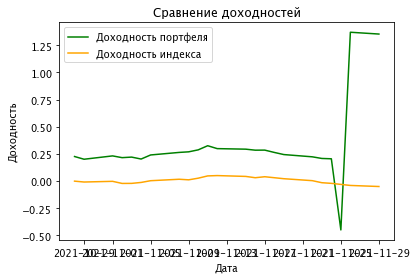

In [96]:
portfolio_number = 11
portfolio_info = 'Портфель серебра (7 шт) Выбран из 30 компаний из ETF на серебро, взяли 40 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['DSV.V', 'PAAS', 'FSM', 'SVM', 'EXK', 'AG', 'SVL.AX']
quantity = [200, 10, 50, 60, 50, 20, 2250]
benchmark = ['SLV']
start = '2021-10-28'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 12
Портфель драгметаллов (20 шт) Выбран из 238 компаний из списка, взяли 10 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 8632
Текущая стоимость портфеля 7565
********************************
Доходность портфеля -12.36 %
Доходность портфеля годовая -135.44 %
Доходность индекса годовая -32.96 %
********************************
Maximum Drawdown -15.72%
Sharp -15.38
Sortino -23.38


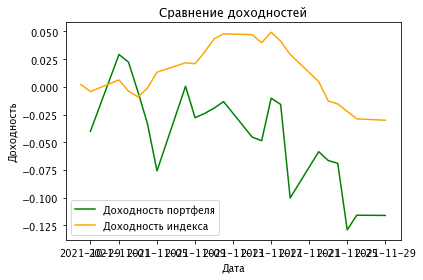

In [97]:
portfolio_number = 12
portfolio_info = 'Портфель драгметаллов (20 шт) Выбран из 238 компаний из списка, взяли 10 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['ZIM.AX', 'VAL.AX', 'AGD.AX', 'EUA.L', 'POLY.L', '31L.F', 'FPOA.F', 'MLBAT.PA', 'ABRA.V', 'MTA.V', 'ELVT.V', 'PGDC.V', 'RRI.V', 'AYA.TO', 'PTM.TO', 'GATO', 'NSR']
quantity = [25, 30000, 5000, 392, 10, 100, 5700, 180, 500, 30, 200, 3269, 1500, 30, 100, 20, 30]
benchmark = ['GLTR']
start = '2021-10-28'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 13
Портфель золота (30 шт) Выбран из 621 компании списка. взяли 5 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 3665
Текущая стоимость портфеля 3380
********************************
Доходность портфеля -7.78 %
Доходность портфеля годовая -89.15 %
Доходность индекса годовая -9.16 %
********************************
Maximum Drawdown -9.57%
Sharp -19.31
Sortino -28.26


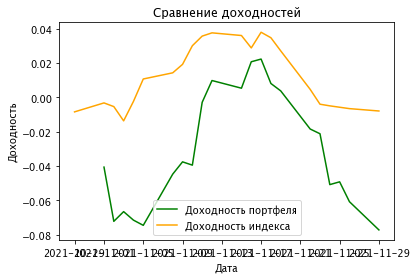

In [98]:
portfolio_number = 13
portfolio_info = 'Портфель золота (30 шт) Выбран из 621 компании списка. взяли 5 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['GCY.AX', 'KZR.AX', 'WMC.AX', 'FJZ.F', 'BTO.TO', 'CXB.TO', 'GCM.TO', 'HRT.TO', 'KNT.TO', 'LUG.TO', 'STGO.TO', 'TXG.TO', 'AGD.V', 'AVG.V', 'ELO.V', 'FGC.V', 'LPK.V', 'OSU.V', 'RCT.V', 'VEIN.V', 'WKG.V', 'ZON.V']
quantity = [1400, 1500, 358, 120, 40, 200, 40, 3300, 28, 20, 150, 15, 4000, 2200, 50, 6500, 3900, 800, 2800, 300, 1500, 1000]
benchmark = ['GLD']
start = '2021-10-29'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 14
Портфель Малайзии (17 шт) Выбран из 920 компании всего рынка малазийской биржи. взяли 2 процента от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4608
Текущая стоимость портфеля 4357
********************************
Доходность портфеля -5.45 %
Доходность портфеля годовая -68.72 %
Доходность индекса годовая -16.71 %
********************************
Maximum Drawdown -8.12%
Sharp -16.55
Sortino -19.44


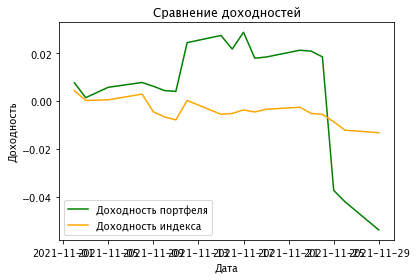

In [99]:
portfolio_number = 14
portfolio_info = 'Портфель Малайзии (17 шт) Выбран из 920 компании всего рынка малазийской биржи. взяли 2 процента от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['5102.KL', '0100.KL', '7191.KL', '7210.KL', '5908.KL', '0156.KL', '8966.KL', '0128.KL', '7133.KL', '0126.KL', '3301.KL', '0099.KL', '7035.KL', '7155.KL', '1007.KL', '3255.KL', '0097.KL', '1589.KL', '7233.KL']
quantity = [300, 2500, 1200, 1100, 200, 4700, 2400, 300, 700, 1800, 100, 1000, 1800, 600, 1200, 100, 100, 3000, 300]
benchmark = ['^KLSE']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 15
Портфель Турции (11 шт) Выбран из 174 компании Турецкой биржи, которые есть на Exante. взяли 5 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 1687
Текущая стоимость портфеля 1538
********************************
Доходность портфеля -8.84 %
Доходность портфеля годовая -106.07 %
Доходность индекса годовая 198.58 %
********************************
Maximum Drawdown -13.98%
Sharp -12.99
Sortino -18.44


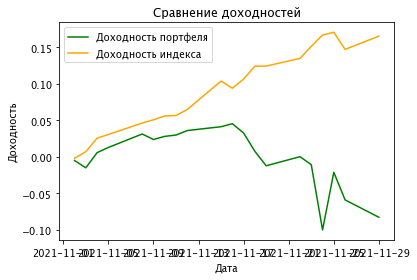

In [100]:
portfolio_number = 15
portfolio_info = 'Портфель Турции (11 шт) Выбран из 174 компании Турецкой биржи, которые есть на Exante. взяли 5 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['VESBE.IS', 'THYAO.IS', 'DEVA.IS', 'ALKIM.IS', 'PAMEL.IS', 'TKFEN.IS', 'NTHOL.IS', 'BERA.IS', 'AEFES.IS', 'TTKOM.IS', 'GOODY.IS']
quantity = [286, 104, 78, 104, 26, 104, 390, 182, 78, 208, 208]
benchmark = ['XU100.IS']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 16
Портфель Компаний на Тинькофф не из США (26 шт) Выбран из 145 компании в аккаунте тинькова. взяли 20 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 5074
Текущая стоимость портфеля 4882
********************************
Доходность портфеля -3.79 %
Доходность портфеля годовая -47.72 %
Доходность индекса годовая -21.24 %
********************************
Maximum Drawdown -6.47%
Sharp -12.5
Sortino -16.59


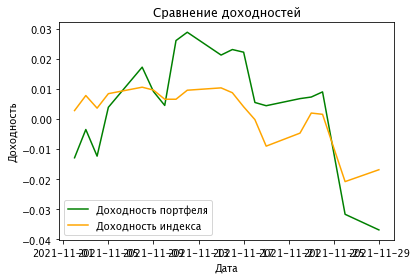

In [101]:
portfolio_number = 16
portfolio_info = 'Портфель Компаний на Тинькофф не из США (26 шт) Выбран из 145 компании в аккаунте тинькова. взяли 20 процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['TAL', 'LHA.F', 'ACH', 'TTM', 'AZN', 'CCJ', 'AFX.F', 'HTHT', 'VEON', 'HEI', 'WB', 'ENDP', 'KEP', 'HNP', 'VALE', 'DTE.F', 'VOW3.F', 'LPL', 'BMW.F', 'BUD', 'YY', '1COV.F', 'EOAN.F', 'VIPS', 'FRE.F']
quantity = [55, 39, 15, 7, 4, 9, 1, 5, 105, 3, 5, 47, 23, 11, 17, 12, 1, 27, 2, 4, 4, 3, 18, 20, 5]
benchmark = ['IWD']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 17
Портфель Компаний на Тинькофф из Russel1000 Value с пересечением списка Тинькова (26 шт) Выбран из 848 компании . взяли 5% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 10319
Текущая стоимость портфеля 10614
********************************
Доходность портфеля 2.86 %
Доходность портфеля годовая 36.01 %
Доходность индекса годовая -15.07 %
********************************
Maximum Drawdown -2.55%
Sharp 14.23
Sortino 20.04


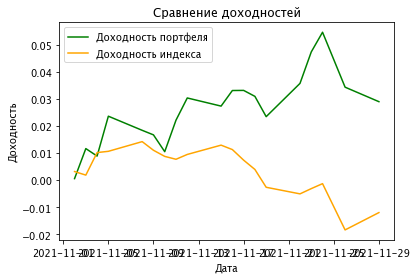

In [102]:
portfolio_number = 17
portfolio_info = 'Портфель Компаний на Тинькофф из Russel1000 Value с пересечением списка Тинькова (26 шт) Выбран из 848 компании . взяли 5% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['BLDR', 'CLF', 'UGI', 'HRB', 'XPO', 'HPQ', 'CCK', 'SSNC', 'SLG', 'SWK', 'RS', 'VSAT', 'EIX', 'LEN', 'SCCO', 'NLOK', 'CMI', 'DG', 'DHR', 'BURL', 'KIM', 'UNP', 'VMW', 'AME', 'KEX', 'UNH']
quantity = [8, 19, 11, 20, 5, 15, 4, 6, 7, 3, 3, 8, 7, 5, 8, 18, 2, 2, 1, 2, 20, 2, 3, 3, 8, 1]
benchmark = ['^RLV']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 18
Портфель из состава ETF AMLP (7 шт) Выбран из 15 компаний. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 3553
Текущая стоимость портфеля 3355
********************************
Доходность портфеля -5.57 %
Доходность портфеля годовая -70.14 %
Доходность индекса годовая -118.64 %
********************************
Maximum Drawdown -8.48%
Sharp -15.12
Sortino -20.63


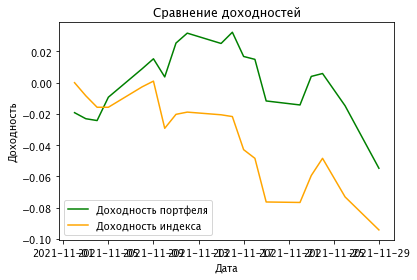

In [103]:
portfolio_number = 18
portfolio_info = 'Портфель из состава ETF AMLP (7 шт) Выбран из 15 компаний. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['ET', ' NS', ' WES', ' PAA', ' HEP', ' GEL', ' EPD']
quantity = [58, 29, 29, 58, 29, 58, 29]
benchmark = ['AMLP']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 19
Портфель компаний из Южной Америки (15 шт) Выбран из 104 компаний выгруженных по всем странам Южной америки с Гуру. взяли 20% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4340
Текущая стоимость портфеля 3983
********************************
Доходность портфеля -8.24 %
Доходность портфеля годовая -103.82 %
Доходность индекса годовая -67.79 %
********************************
Maximum Drawdown -8.35%
Sharp -24.76
Sortino -39.16


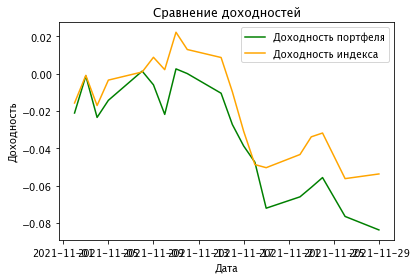

In [104]:
portfolio_number = 19
portfolio_info = 'Портфель компаний из Южной Америки (15 шт) Выбран из 104 компаний выгруженных по всем странам Южной америки с Гуру. взяли 20% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['EDN', 'TGH', 'PAM', 'IRCP', 'YPF', 'IRS', 'TK', 'BBU', 'HMLP', 'TNK', 'NAT', 'VALE', 'AENZ', 'SUZ', 'SID']
quantity = [49, 7, 21, 119, 77, 70, 91, 7, 70, 21, 140, 28, 175, 42, 84]
benchmark = ['ILF']
start = '2021-11-01'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 20
Портфель компаний из ETF URA (14 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 40% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4709
Текущая стоимость портфеля 4582
********************************
Доходность портфеля -2.7 %
Доходность портфеля годовая -34.02 %
Доходность индекса годовая -43.98 %
********************************
Maximum Drawdown -27.30%
Sharp -1.46
Sortino -2.22


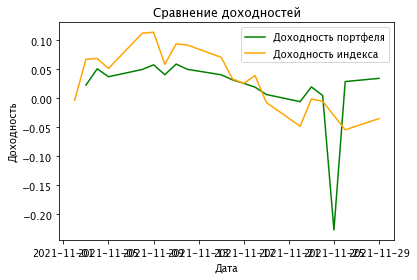

In [105]:
portfolio_number = 20
portfolio_info = 'Портфель компаний из ETF URA (14 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 40% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['GGG.AX', 'PDN.AX', 'BMN.AX', '0ZQ.F', 'BBL', 'ARE.TO', 'MQG.AX', 'CCJ', 'SSW.JO', 'EU.V', 'RIO.AX']
quantity = [4185, 606, 1569, 6, 12, 40, 4, 24, 168, 420, 8]
benchmark = ['URA']
start = '2021-11-02'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 21
Портфель компаний из ETF DAPP (9 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 5923
Текущая стоимость портфеля 5780
********************************
Доходность портфеля -2.41 %
Доходность портфеля годовая -30.39 %
Доходность индекса годовая -29.84 %
********************************
Maximum Drawdown -16.80%
Sharp -2.78
Sortino -4.4


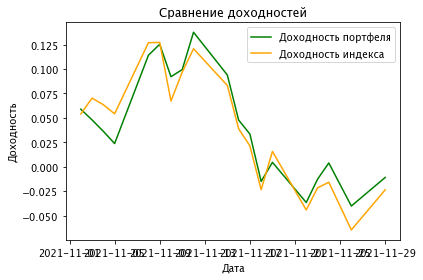

In [106]:
portfolio_number = 21
portfolio_info = 'Портфель компаний из ETF DAPP (9 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['GBOX', 'CLSK', 'HIVE', 'DMGI.V', 'RIOT', 'BTBT', 'HUT', 'MSTR', 'ARB.L']
quantity = [116, 34, 194, 941, 26, 62, 52, 1, 415]
benchmark = ['DAPP']
start = '2021-11-02'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 22
Портфель компаний из ETF REMX (6 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4248
Текущая стоимость портфеля 4430
********************************
Доходность портфеля 4.29 %
Доходность портфеля годовая 54.02 %
Доходность индекса годовая 84.49 %
********************************
Maximum Drawdown -21.09%
Sharp 2.56
Sortino 3.73


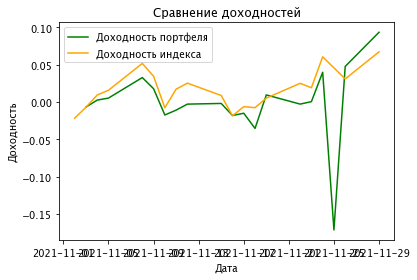

In [107]:
portfolio_number = 22
portfolio_info = 'Портфель компаний из ETF REMX (6 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['LTR.AX', 'SLI.V', 'LAC', 'ER7.F', 'ILU.AX', 'ADG.F']
quantity = [580, 60, 30, 10, 120, 30]
benchmark = ['REMX']
start = '2021-11-02'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 23
Портфель компаний из ETF HERO (9 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach
********************************
Первоначальная стоимость портфеля 4420
Текущая стоимость портфеля 4014
********************************
Доходность портфеля -9.17 %
Доходность портфеля годовая -135.94 %
Доходность индекса годовая -3.22 %
********************************
Maximum Drawdown -90.01%
Sharp -0.2
Sortino -0.74


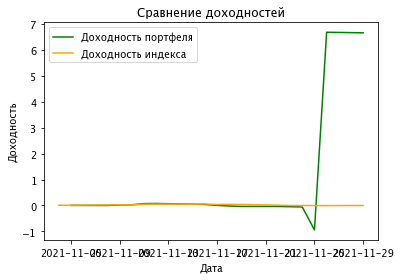

In [108]:
portfolio_number = 23
portfolio_info = 'Портфель компаний из ETF HERO (9 шт) Выбран из списка компаний выгруженных по Составу ETF. взяли 50% процентов от всего списка. Стратегия XGBoost max index MOM+TREND feach'
portfolio = ['3656.T', 'HEAR', 'DOYU', 'ZNGA', 'HUYA', 'GRVY', 'CRSR', 'ATVI', 'TTWO']
quantity = [100, 21, 170, 80, 65, 6, 20, 9, 3]
benchmark = ['HERO']
start = '2021-11-04'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 24
Портфель финансовых компаний доступных на тинькове (157 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1
********************************
Первоначальная стоимость портфеля 3892
Текущая стоимость портфеля 3859
********************************
Доходность портфеля -0.86 %
Доходность портфеля годовая -15.56 %
Доходность индекса годовая -47.74 %
********************************
Maximum Drawdown -3.64%
Sharp -2.87
Sortino -3.54


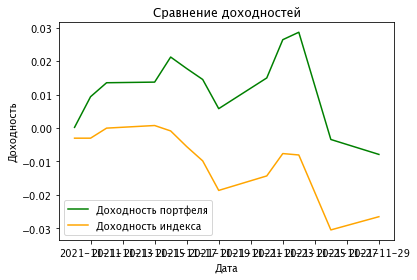

In [109]:
portfolio_number = 24
portfolio_info = 'Портфель финансовых компаний доступных на тинькове (157 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1'
portfolio = ['AMSF', 'AON', 'AX', 'BRO', 'FDS', 'GDOT', 'HLI', 'IBN', 'KNSL', 'PJT', 'SCHW']
quantity = [9, 2, 7, 8, 1, 11, 4, 24, 2, 1, 1]
benchmark = ['IWD']
start = '2021-11-10'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 25
Портфель не США компаний доступных на тинькове (157 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1
********************************
Первоначальная стоимость портфеля 7142
Текущая стоимость портфеля 6774
********************************
Доходность портфеля -5.16 %
Доходность портфеля годовая -92.83 %
Доходность индекса годовая -42.25 %
********************************
Maximum Drawdown -68.31%
Sharp -0.33
Sortino -0.83


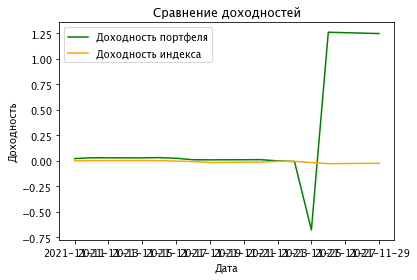

In [110]:
portfolio_number = 25
portfolio_info = 'Портфель не США компаний доступных на тинькове (157 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1'
portfolio = ['1COV.F', 'AFX.F', 'AZN', 'DWNI.F', 'HTHT', 'MGA', 'PUM.F', 'STLA', 'VALE', 'VIPS', 'VOW3.F', 'YY']
quantity = [3, 4, 13, 15, 17, 10, 6, 39, 67, 55, 1, 16]
benchmark = ['IWD']
start = '2021-11-11'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

Портфель № 26
Портфель из LSE AIM компаний (200 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1
********************************
Первоначальная стоимость портфеля 4884
Текущая стоимость портфеля 4393
********************************
Доходность портфеля -10.05 %
Доходность портфеля годовая -180.89 %
Доходность индекса годовая -78.23 %
********************************
Maximum Drawdown -9.59%
Sharp -27.51
Sortino -40.82


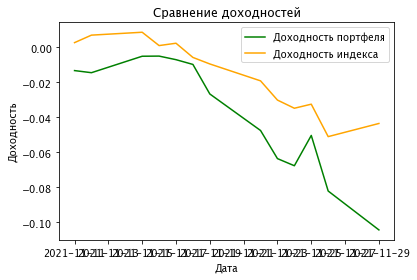

In [111]:
portfolio_number = 26
portfolio_info = 'Портфель из LSE AIM компаний (200 компаний). Метод: KNN 20%, развесовка по келли с весом 0,1'
portfolio = ['CAMB.BR', 'EUA.L', 'GFM.L', 'OPTI.L', 'SDG.L', 'SDX.L', 'SLP.L', 'TRIN.L', 'ZOO.L']
quantity = [3, 2000, 480, 1000, 300, 3800, 500, 400, 400]
benchmark = ['^FTAI']
start = '2021-11-11'

portfolio_calculate(portfolio_number, portfolio_info, portfolio, quantity, benchmark, start)

In [134]:
portfolio_df = pd.DataFrame()
portfolio_df['Number'] = portfolio_numbers
portfolio_df['Description'] = portfolio_name
portfolio_df['Portfolio Price'] = porfolio_price
portfolio_df['Percent from all'] = portfolio_df['Portfolio Price']*100/portfolio_df['Portfolio Price'].sum()
capital_in_portfolio = portfolio_df['Portfolio Price'].sum()

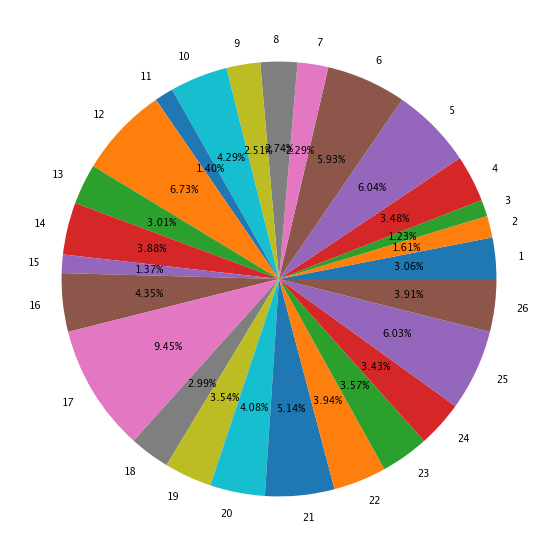

In [152]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(portfolio_df['Portfolio Price'], labels=portfolio_df['Number'] , autopct='%1.2f%%')
#ax1.axis('equal')
#ax1.legend(labels=portfolio_df['Description'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [137]:
portfolio_df

,Number,Description,Portfolio Price,Percent from all
0,1,Российский портфель (8 шт). Был выбран из 71 р...,3443.511643,3.064746
1,2,Российский портфель (11 шт). Был выбран из 71 ...,1813.611386,1.614125
2,3,Российский портфель (11 шт). Был выбран из 71 ...,1380.054035,1.228256
3,4,Мексиканский портфель (12 шт). Был выбран из 8...,3908.090471,3.478224
4,5,Канадский венчурный портфель (25 шт). Был выбр...,6783.952383,6.037759
5,6,Швейцарский портфель (9 шт). Был выбран из 120...,6660.968876,5.928302
6,7,Австралийский портфель (13 шт). Был выбран из ...,2571.191030,2.288376
7,8,Сингапурский портфель (24 шт). Был выбран из 2...,3076.796291,2.738367
8,9,ЮАР портфель (20 шт). Был выбран из 100 компан...,2822.016820,2.511612
9,10,Американский портфель(27 шт) Выбран из 293 ком...,4821.484171,4.291150


In [142]:
print('Капитал в портфелях:', round(capital_in_portfolio), 'EUR')

Капитал в портфелях: 112359 EUR
